In [1]:
!pip install -U scikit-learn==1.6.1 pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 79.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 80.3 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.3
    Uninstalling pandas-2.2.3:
      Successfully uninstalled pandas-2.2.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.8.0 requires google-cloud-bigquery-storage<3.0.0,>=2.30.0, which is not installed.
dask-cudf-cu12 25.2.2 requires pandas<2.2.4dev0,>=2.0, but you have pandas 2.3.1 which is incompatible.
cudf-cu12 25.2.2 requires pandas<2.2.4dev0,>=2.0, but you ha

In [2]:
import pandas as pd

dataset = pd.read_csv("/kaggle/input/airlines-flights-data/airlines_flights_data.csv", index_col="index")
dataset.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
index,,,,,,,,,,,
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [3]:
def get_cat_cols(df: pd.DataFrame) -> list:
    
    return [col for col in df.columns if df[col].dtype == 'object']

def get_num_cols(df: pd.DataFrame):

    return [col for col in df.columns if df[col].dtype != 'object']

def get_info(dataset: pd.DataFrame):

    new_df = pd.DataFrame()
    new_df['missing_count'] = dataset.isnull().sum()
    new_df['total'] = dataset.shape[0]
    new_df['missing%'] = (dataset.isnull().sum() / dataset.shape[0])*100
    new_df['n_unique'] = dataset.nunique()
    new_df['type'] = dataset.dtypes
    
    print(f"Size: {dataset.shape}")
    
    return new_df

In [4]:
cat_cols = get_cat_cols(dataset)
num_cols = get_num_cols(dataset)

get_info(dataset)

Size: (300153, 11)


,missing_count,total,missing%,n_unique,type
airline,0,300153,0.0,6,object
flight,0,300153,0.0,1561,object
source_city,0,300153,0.0,6,object
departure_time,0,300153,0.0,6,object
stops,0,300153,0.0,3,object
arrival_time,0,300153,0.0,6,object
destination_city,0,300153,0.0,6,object
class,0,300153,0.0,2,object
duration,0,300153,0.0,476,float64
days_left,0,300153,0.0,49,int64


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 27.5+ MB


In [6]:
dataset.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


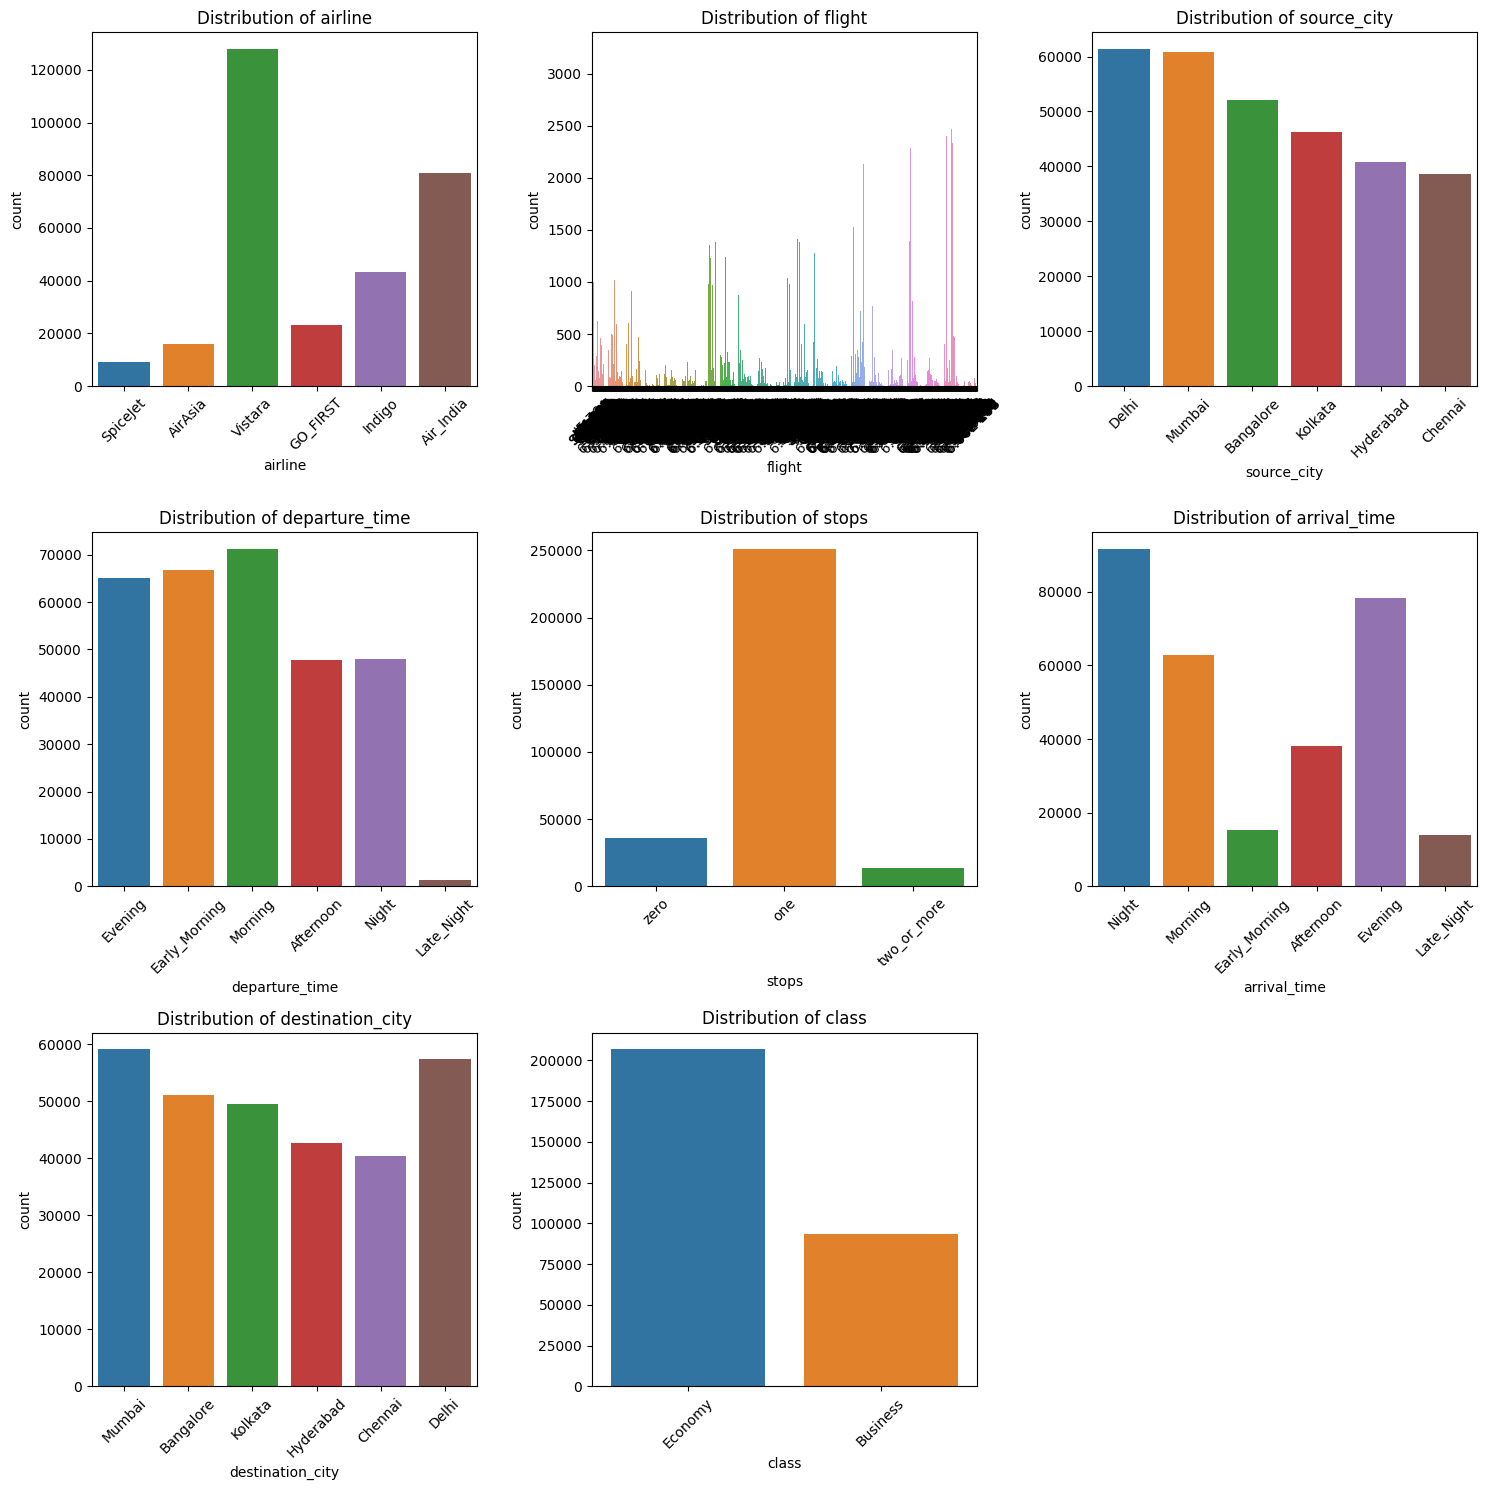

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

total_cat_cols = len(cat_cols)
ncols = 3
nrows = math.ceil(total_cat_cols / ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))
plt.subplots_adjust(hspace=0.5)

axes = axes.flatten() if total_cat_cols > 1 else [axes]

for i, col in enumerate(cat_cols):
    sns.countplot(x=dataset[col], ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

<Axes: xlabel='stops', ylabel='count'>

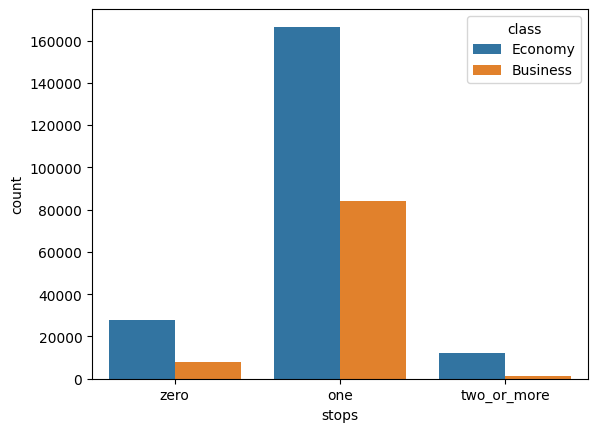

In [8]:
sns.countplot(dataset, x="stops", hue="class")

In [9]:
distribution = pd.crosstab(dataset["stops"], dataset["class"], normalize="index")
print(distribution)

class        Business   Economy
stops                          
one          0.336048  0.663952
two_or_more  0.081514  0.918486
zero         0.225031  0.774969


In [10]:
dataset["class"].value_counts() / 300153

class
Economy     0.688536
Business    0.311464
Name: count, dtype: float64

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


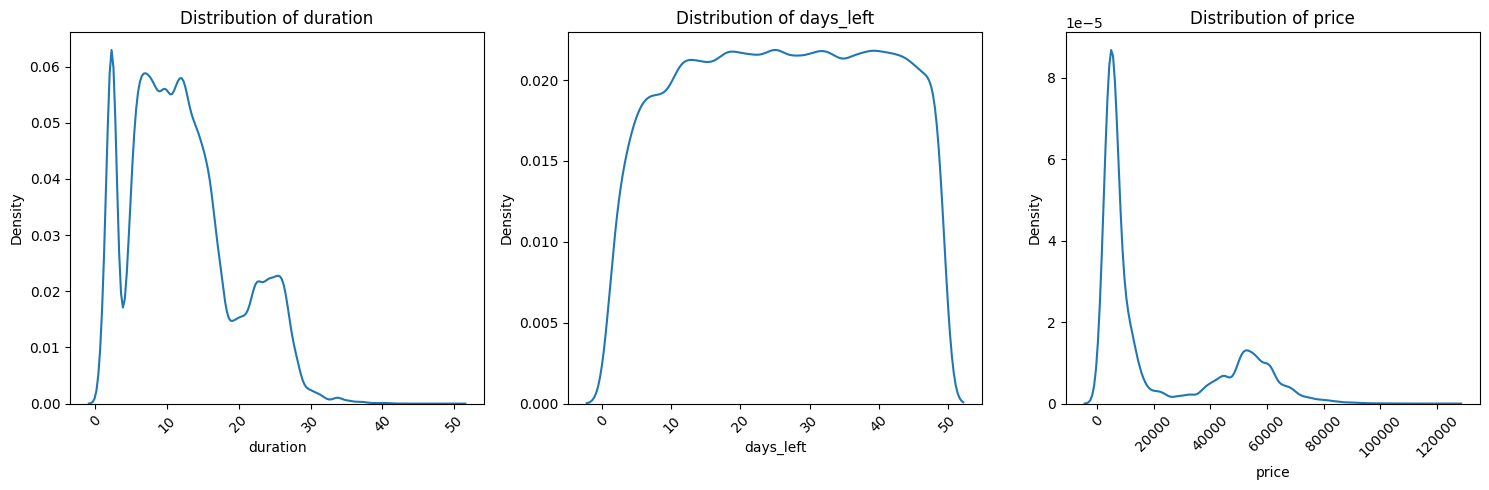

In [11]:
total_num_cols = len(num_cols)
ncols = 3
nrows = math.ceil(total_num_cols / ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))
plt.subplots_adjust(hspace=0.5)

axes = axes.flatten() if total_num_cols > 1 else [axes]

for i, col in enumerate(num_cols):
    sns.kdeplot(x=dataset[col], ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

In [12]:
from sklearn.model_selection import train_test_split

y = dataset["price"]
X = dataset.drop("price", axis="columns")

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [13]:
import pandas as pd
import pickle
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

def split_cat_cols(df, threshold=4):
    one_hot_cols = []
    label_cols = []
    
    cat_cols = df.select_dtypes(include=['object', 'category']).columns
    
    for col in cat_cols:
        if df[col].nunique() < threshold:
            one_hot_cols.append(col)
        else:
            label_cols.append(col)
    
    return one_hot_cols, label_cols


def encode_categorical(df, one_hot_cols, label_cols):

    df_encoded = df.copy()

    label_encoders = {}
    for col in label_cols:
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
        label_encoders[col] = le  

    with open('label_encoders.pkl', 'wb') as f:
        pickle.dump(label_encoders, f)

    if one_hot_cols:
        ohe = OneHotEncoder(sparse_output=False, drop='first')
        df_subset = df_encoded[one_hot_cols] if len(one_hot_cols) > 1 else df_encoded[[one_hot_cols[0]]]
        ohe_encoded = ohe.fit_transform(df_subset)
        ohe_df = pd.DataFrame(ohe_encoded, 
                              columns=ohe.get_feature_names_out(one_hot_cols), 
                              index=df.index)
        df_encoded = df_encoded.drop(columns=one_hot_cols)
        df_encoded = pd.concat([df_encoded, ohe_df], axis=1)

        with open('onehot_encoder.pkl', 'wb') as f:
            pickle.dump(ohe, f)

    with open('cat_columns.pkl', 'wb') as f:
        pickle.dump({'one_hot_cols': one_hot_cols, 'label_cols': label_cols}, f)
    
    return df_encoded


one_hot_cols, label_cols = split_cat_cols(dataset)

x_train_encoded = encode_categorical(x_train, one_hot_cols, label_cols)
x_test_encoded = encode_categorical(x_test, one_hot_cols, label_cols)

In [14]:
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def evaluate_model(name, model, X_test, y_test):
    preds = model.predict(X_test)
    mae = mean_absolute_error(y_test, preds)
    mse = mean_squared_error(y_test, preds)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, preds)

    print(f"\n{name} Evaluation:")
    print(f" - R2 Score: {r2:.4f}")
    print(f" - MAE     : {mae:.4f}")
    print(f" - MSE     : {mse:.4f}")
    print(f" - RMSE    : {rmse:.4f}")

lr_model = LinearRegression()
lr_model.fit(x_train_encoded, y_train)
evaluate_model("Linear Regression", lr_model, x_test_encoded, y_test)

xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(x_train_encoded, y_train)
evaluate_model("XGBoost Regressor", xgb_model, x_test_encoded, y_test)

cat_model = CatBoostRegressor(verbose=False, iterations=100, learning_rate=0.1, random_seed=42)
cat_model.fit(x_train_encoded, y_train)
evaluate_model("CatBoost Regressor", cat_model, x_test_encoded, y_test)


Linear Regression Evaluation:
 - R2 Score: 0.9083
 - MAE     : 4583.3974
 - MSE     : 47148691.2365
 - RMSE    : 6866.4905

XGBoost Regressor Evaluation:
 - R2 Score: 0.9440
 - MAE     : 3043.0347
 - MSE     : 28758330.0000
 - RMSE    : 5362.6794

CatBoost Regressor Evaluation:
 - R2 Score: 0.9531
 - MAE     : 2897.3768
 - MSE     : 24096058.1087
 - RMSE    : 4908.7736


In [15]:
import pickle

with open('linear_regression_model.pkl', 'wb') as f:
    pickle.dump(lr_model, f)

with open('xgb_regression_model.pkl', 'wb') as f:
    pickle.dump(xgb_model, f)

with open('catboost_regression_model.pkl', 'wb') as f:
    pickle.dump(cat_model, f)